# Customer Segmentation & Revenue Drivers in E-Commerce

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported correctly.")

Libraries imported correctly.


## Initial Data Inspection

In [3]:
from pathlib import Path

DATA_PATH = Path("../data/data.csv")

df = pd.read_csv(DATA_PATH, encoding="latin-1") #Dataset is not UTF-8
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


- The dataset contains 541909 rows and 8 columns
- Columns include transaction, product, customer, pricing, and date information
- Some columns contain missing values (to be addressed)
- The date column is currently stored as a string (will need to be converted later)
- Some odd looking (negative) numbers in quantity and price 

## Data Cleaning

Before performing any analysis, we first prepare the dataset to make sure that results are accurate and relevant in a business setting.


In [7]:
# Convert invocie date from string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

df[['InvoiceDate']].head()

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


In [8]:
# Count negative quantities
print("Negative quantities:", (df['Quantity'] < 0).sum())

# Count negative prices
print("Negative unit prices:", (df['UnitPrice'] < 0).sum())

# Optional: see first few examples
df[df['Quantity'] < 0].head()

Negative quantities: 10624
Negative unit prices: 2


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [9]:
# Remove returns/cancelled orders
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Quick check
df_clean.shape, df.shape

((530104, 8), (541909, 8))

In [10]:
# Missing customer ids
df_clean['CustomerID'].isna().sum()

np.int64(132220)

In [11]:
# For customer-level analysis only
df_customers = df_clean.dropna(subset=['CustomerID'])
df_customers['CustomerID'] = df_customers['CustomerID'].astype(str)

C:\Users\Rodri\AppData\Local\Temp\ipykernel_9648\1297772600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['CustomerID'] = df_customers['CustomerID'].astype(str)


In [12]:
# Create revenue column
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

C:\Users\Rodri\AppData\Local\Temp\ipykernel_9648\1244549504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']


In [13]:
df_clean[['Quantity', 'UnitPrice', 'Revenue']].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [14]:
df_clean['Revenue'].describe()


count    530104.000000
mean         20.121871
std         270.356743
min           0.001000
25%           3.750000
50%           9.900000
75%          17.700000
max      168469.600000
Name: Revenue, dtype: float64

1. Converted `InvoiceDate` to datetime
2. Inspected and removed returns / negative prices to focus on final sales
3. Handled missing `CustomerID` values to analyze customer data later
4. Created `Revenue` column for all transactions


## Overall Revenue - How much are we selling over time?

We begin by analyzing how revenue evolves over time to understand the overall health and seasonality of the business.

In [15]:
# Create a day only column 
df_clean['InvoiceDay'] = df_clean['InvoiceDate'].dt.date
df_clean[['InvoiceDate', 'InvoiceDay']].head()

C:\Users\Rodri\AppData\Local\Temp\ipykernel_9648\2774134522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDay'] = df_clean['InvoiceDate'].dt.date


,InvoiceDate,InvoiceDay
0,2010-12-01 08:26:00,2010-12-01
1,2010-12-01 08:26:00,2010-12-01
2,2010-12-01 08:26:00,2010-12-01
3,2010-12-01 08:26:00,2010-12-01
4,2010-12-01 08:26:00,2010-12-01


In [16]:
# Daily revenue
daily_revenue = (
    df_clean
    .groupby('InvoiceDay')['Revenue']
    .sum()
    .reset_index()
)

In [17]:
daily_revenue.head()

,InvoiceDay,Revenue
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-05,31774.95
4,2010-12-06,54830.46


In [18]:
daily_revenue.tail()

,InvoiceDay,Revenue
300,2011-12-05,88741.96
301,2011-12-06,56713.21
302,2011-12-07,75439.16
303,2011-12-08,82495.00
304,2011-12-09,200920.60


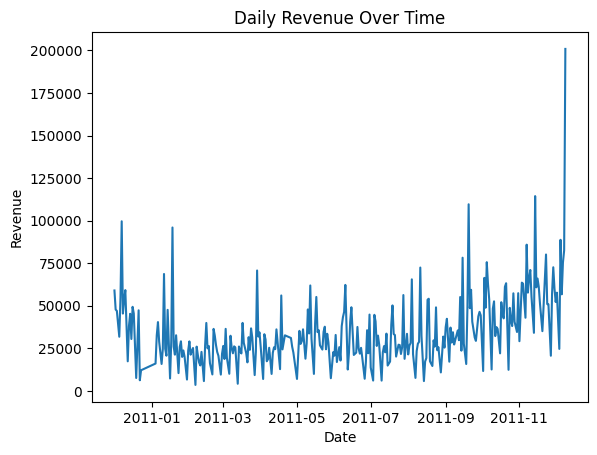

In [19]:
plt.figure()
plt.plot(daily_revenue['InvoiceDay'], daily_revenue['Revenue'])
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [20]:
# Monthly revenue

df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

monthly_revenue = (
    df_clean
    .groupby('InvoiceMonth')['Revenue']
    .sum()
    .reset_index()
)

monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)

C:\Users\Rodri\AppData\Local\Temp\ipykernel_9648\2127158429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')


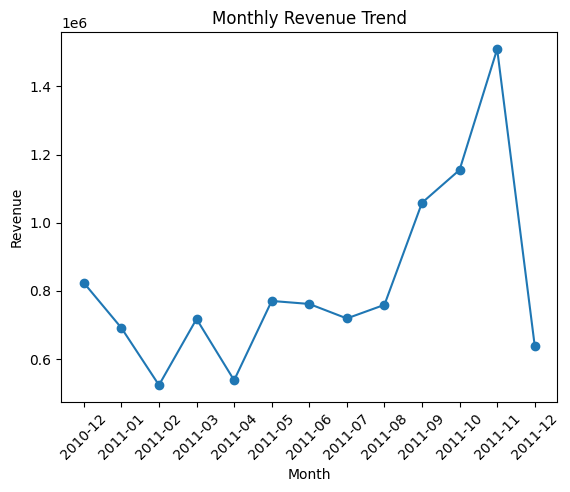

In [21]:
plt.figure()
plt.plot(monthly_revenue['InvoiceMonth'], monthly_revenue['Revenue'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

- The dataset covers roughly one year (late 2010 to late 2011)  
- Daily revenue is a bit noisy, but shows an overall upward trend through 2011  
- Grouping by month reveals clearer patterns:
  - Early 2011 shows lower monthly revenue
  - From about August to November revenue rises substantially, peaking in November (potential effect of Black Friday promotions)
  - December shows a drop from the November peak
- The strong increase from late summer into November suggests seasonal demand or successful campaigns in Q3–Q4; we should investigate which products, customers, and channels drove that growth


## Revenue by Product

To evaluate true product demand, we'll remove non-product line items (postage, manual adjustments, discounts) prior to analysis.

In [40]:
# Explicit stock codes that represent postage/manual entries we saw in the data
bad_stockcodes = ['POST', 'DOT', 'M']  

# Description patterns to remove 
bad_desc_patterns = ['POSTAGE', 'MANUAL', 'ADJUST', 'ADJUSTMENT', 'SAMPLE', 'SAMPLES', 'DISCOUNT']

# Build masks
mask_desc = df_clean['Description'].fillna('').str.upper().str.contains('|'.join(bad_desc_patterns))
mask_stock = df_clean['StockCode'].astype(str).str.upper().isin([s.upper() for s in bad_stockcodes])

# df_products = product-level dataset with postage/manual removed
df_products = df_clean[~(mask_desc | mask_stock)].copy()

# Check
print("Rows in df_clean:", len(df_clean))
print("Rows in df_products (postage/manual removed):", len(df_products))
print("Rows removed:", len(df_clean) - len(df_products))


Rows in df_clean: 530104
Rows in df_products (postage/manual removed): 527947
Rows removed: 2157


In [23]:
# === Cell Y: Top products by revenue (cleaned) ===

prod_rev_clean = (
    df_products
    .dropna(subset=['Description'])
    .groupby(['StockCode', 'Description'], as_index=False)['Revenue']
    .sum()
    .sort_values('Revenue', ascending=False)
)

# Show top 20 cleaned products
prod_rev_clean.head(20)


,StockCode,Description,Revenue
1340,22423,REGENCY CAKESTAND 3 TIER,174484.74
2668,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3640,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104340.29
2877,47566,PARTY BUNTING,99504.33
3619,85099B,JUMBO BAG RED RETROSPOT,94340.05
2123,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
2029,23084,RABBIT NIGHT LIGHT,66964.99
1022,22086,PAPER CHAIN KIT 50'S CHRISTMAS,64952.29
3416,84879,ASSORTED COLOUR BIRD ORNAMENT,59094.93
3059,79321,CHILLI LIGHTS,54117.76


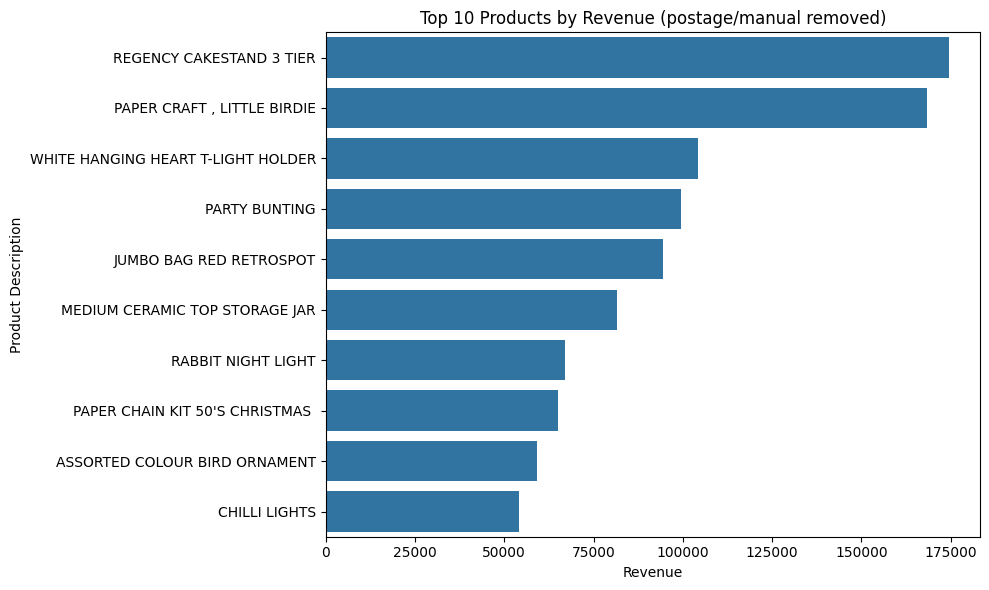

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=prod_rev_clean.head(10), x='Revenue', y='Description')
plt.title("Top 10 Products by Revenue (postage/manual removed)")
plt.xlabel("Revenue")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()


- Revenue is mostly driven by a relatively small set of best-selling products
- The top products include:
  - REGENCY CAKESTAND 3 TIER (£174k)
  - PAPER CRAFT, LITTLE BIRDIE (£168k)
  - WHITE HANGING HEART T-LIGHT HOLDER (£104k)
- Many of the top products are decorative or gift items, suggesting strong demand for seasonal and home decoration categories.

Business implications:
- These SKUs should be prioritized for inventory availability, especially during high-demand periods
- It could be a good idea to bundle together frequently purchased decorative items (e.g., bunting, ornaments, giftware)

## Revenue by Top Clients

In [41]:
df_customers = df_products.dropna(subset=['CustomerID']).copy()
df_customers['CustomerID'] = df_customers['CustomerID'].astype(int)

cust_rev = (
    df_customers
    .groupby('CustomerID', as_index=False)['Revenue']
    .sum()
    .sort_values('Revenue', ascending=False)
)

# Top customers (cleaned)
cust_rev.head(20)

,CustomerID,Revenue
1689,14646,279138.02
4198,18102,259657.30
3726,17450,194550.79
3007,16446,168472.50
1879,14911,140450.72
55,12415,124564.53
1333,14156,117379.63
3769,17511,91062.38
0,12346,77183.60
2701,16029,72882.09


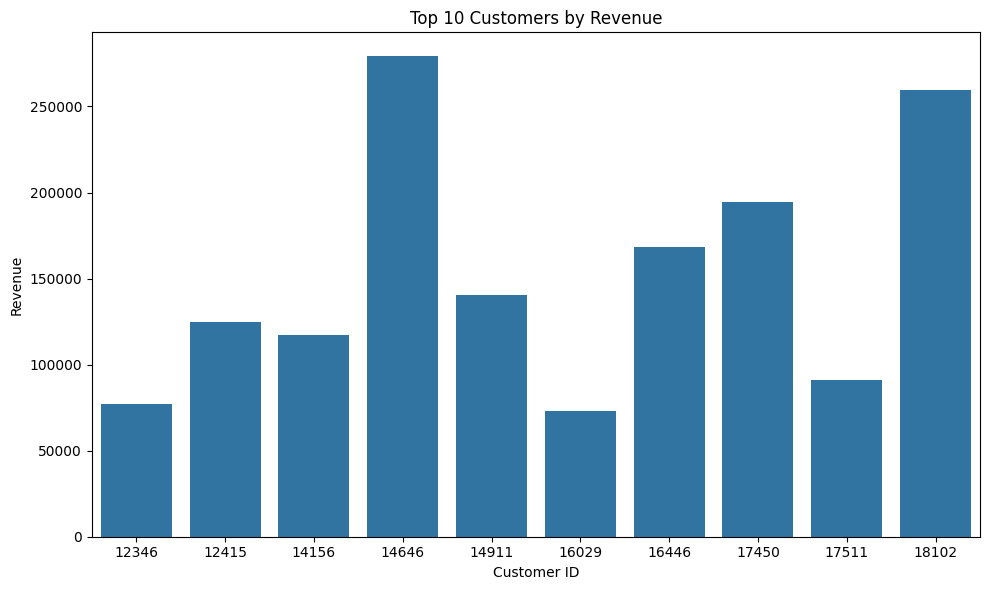

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=cust_rev.head(10), x='CustomerID', y='Revenue')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [27]:
total_rev = cust_rev['Revenue'].sum()
n_customers = len(cust_rev)
top_1pct_count = max(1, int(0.01 * n_customers))
top_10pct_count = max(1, int(0.10 * n_customers))

top_1pct_share = cust_rev['Revenue'].nlargest(top_1pct_count).sum() / total_rev
top_10pct_share = cust_rev['Revenue'].nlargest(top_10pct_count).sum() / total_rev

print("Top 1% share:", top_1pct_share)
print("Top 10% share:", top_10pct_share)

Top 1% share: 0.3195523932323645
Top 10% share: 0.6130872120528699


- The highest value customers contribute a significant portion of total revenue:
  - Top customer: £279k
  - Top 5 customers: each exceeding £140k
- Revenue concentration is high:
  - Top 1% of customers contribute ~32% of total revenue
  - Top 10% contribute ~61% of total revenue

Business implications:
- The business is highly dependent on a relatively small group of high-value customers
- Retention of top customers is very important; losing even a few could materially impact revenue
- High-value customers are strong candidates for:
  - VIP or loyalty programs
  - Personalized promotions
  - Early access to new or seasonal products

## Revenue by Country

In [28]:
country_rev = (
    df_clean
    .groupby('Country', as_index=False)['Revenue']
    .sum()
    .sort_values('Revenue', ascending=False)
)

country_rev.head(15)

,Country,Revenue
36,United Kingdom,9025222.084
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


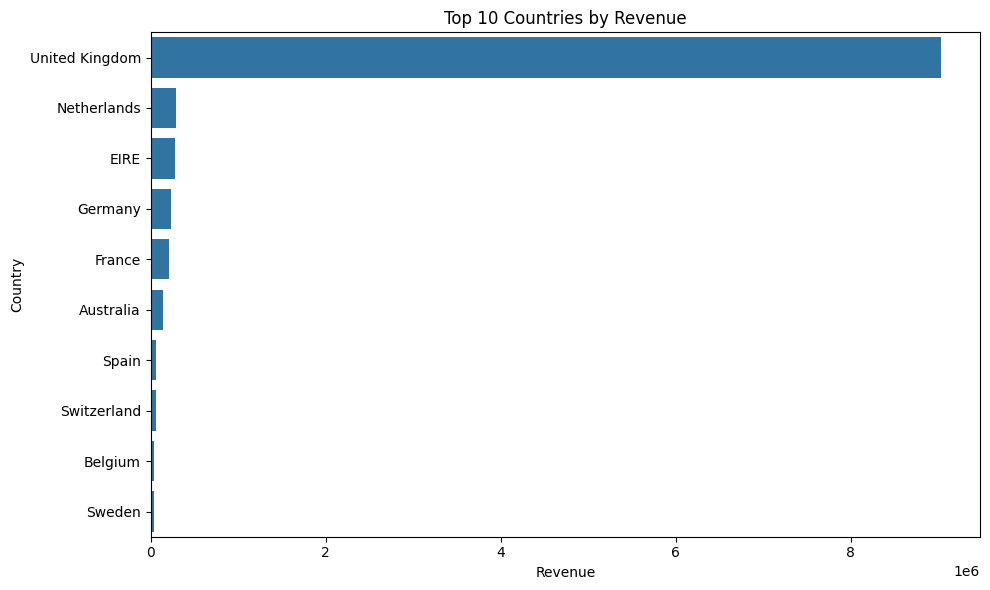

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=country_rev.head(10), x='Revenue', y='Country')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

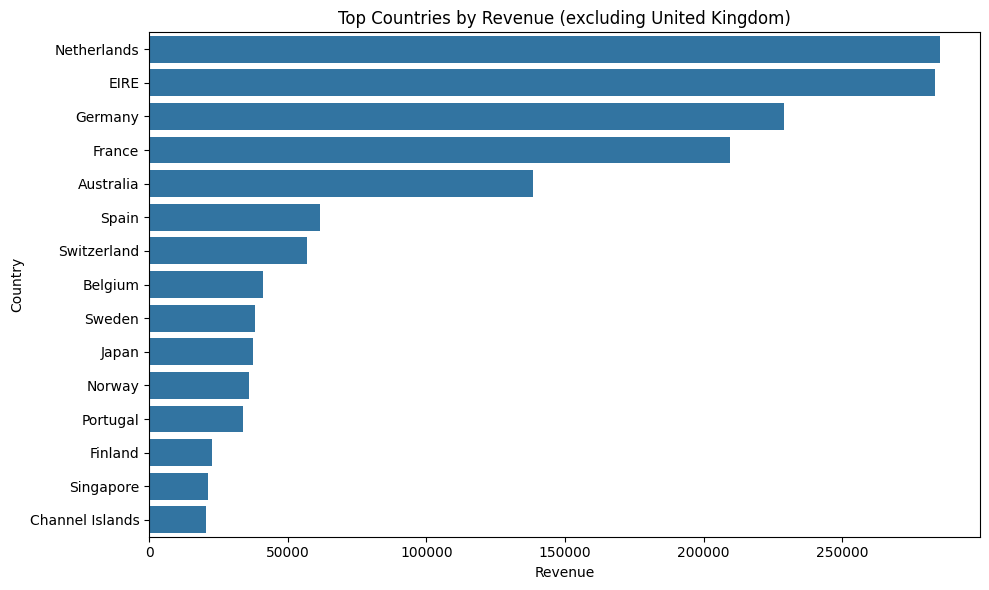

In [30]:
# Plot excluding the United Kingdom
country_no_uk = country_rev[country_rev['Country'] != 'United Kingdom'].copy()

plt.figure(figsize=(10,6))
sns.barplot(data=country_no_uk.head(15), x='Revenue', y='Country')
plt.title("Top Countries by Revenue (excluding United Kingdom)")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

- The United Kingdom dominates revenue, generating approximately £9.0M, far exceeding all other countries.
- Among non-UK markets, the strongest contributors include:
  - Netherlands
  - Eire (Ireland)
  - Germany
  - France

Because UK revenue is significantly larger than all other markets, we used another visualization to better understand international performance.

Business implications:
- The UK is the core market and primary revenue driver
- International revenue is meaningful but fragmented, suggesting growth opportunities through:
  - Targeted international marketing
  - Improved shipping and localization strategies
  - Focus on the strongest non-UK markets first (Netherlands, Eire, Germany, France)

## RFM Segmentation

To move beyond simple revenue rankings, we apply RFM segmentation, a popular framework in marketing analytics.

RFM summarizes customer behavior across three dimensions:
- Recency: How recently a customer made a purchase
- Frequency: How often a customer purchases
- Monetary: How much revenue a customer generates

By scoring customers across these dimensions, we can systematically classify customers into meaningful behavioral segments, enabling more targeted and actionable business strategies.

In [31]:
# Snapshot date (1 day after last purchase)
snapshot_date = df_customers['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [32]:
# Build RFM table
rfm = df_customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # recency days
    'InvoiceNo': 'nunique',                                   # frequency = number of orders
    'Revenue': 'sum'                                          # monetary = total spend
}).rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Revenue':'Monetary'})

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1437.24
12349,19,1,1457.55
12350,310,1,294.40


In [33]:
# Create scores (4 = best, 1 = worst)
# R: smaller Recency (more recent) should be higher score -> assign labels [4,3,2,1] to increasing Recency
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1]).astype(int)

# F & M: larger is better -> assign labels 1..4 to increasing F and M, then map so 4 is best
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4]).astype(int)

# Compose RFM code and numeric sum if you want
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Sum'] = rfm[['R_score','F_score','M_score']].sum(axis=1)

# Quick checks
display(rfm.head())
print("Champions candidate (444):", (rfm['RFM_Score'] == '444').sum())
print("At-risk top-M (R_score==1 & M_score==4):", ((rfm['R_score']==1) & (rfm['M_score']==4)).sum())

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Sum
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6
12347,2,7,4310.00,4,4,4,444,12
12348,75,4,1437.24,2,3,3,233,8
12349,19,1,1457.55,3,1,3,313,7
12350,310,1,294.40,1,1,1,111,3


Champions candidate (444): 497
At-risk top-M (R_score==1 & M_score==4): 50


Using the RFM framework, we identify a group of “Champion” customers who score highly across all three dimensions.

These customers represent the most valuable and engaged segment of the customer base. By isolating this group, we can:
- Quantify their contribution to overall revenue
- Understand how concentrated business performance is within this segment
- Establish a foundation for retention and loyalty strategies

In [42]:
# Champions: top Recency(4), Frequency(4), Monetary(4)
champions = rfm[rfm['RFM_Score'] == '444'].copy()
at_risk_high_value = rfm[(rfm['R_score'] == 1) & (rfm['M_score'] == 4)].copy()

# Counts
n_champions = len(champions)
n_at_risk = len(at_risk_high_value)
n_customers = rfm.shape[0]

# Percent of customers
pct_champions = n_champions / n_customers
pct_at_risk = n_at_risk / n_customers

# Revenue share of champions (use df_customers product-only revenue)
champ_ids = champions.index.astype(int).tolist()
champ_rev = df_customers[df_customers['CustomerID'].isin(champ_ids)]['Revenue'].sum()
total_rev = df_customers['Revenue'].sum()
champ_rev_share = champ_rev / total_rev

# Summary
print(f"Total customers (used in RFM): {n_customers}")
print(f"Champions count: {n_champions} ({pct_champions:.2%} of customers)")
print(f"At-risk (high-monetary) count: {n_at_risk} ({pct_at_risk:.2%} of customers)")
print(f"Champions revenue: £{champ_rev:,.2f} ({champ_rev_share:.2%} of product revenue)")

Total customers (used in RFM): 4335
Champions count: 497 (11.46% of customers)
At-risk (high-monetary) count: 50 (1.15% of customers)
Champions revenue: £4,400,240.13 (50.19% of product revenue)


In [35]:
# Top Champions by monetary value

# Get customer-level aggregates (we already have rfm but join to get nicer display)
cust_summary = rfm[['Recency','Frequency','Monetary','R_score','F_score','M_score','RFM_Score','RFM_Sum']].copy()

# Display top champions sorted by Monetary
champions_sorted = cust_summary.loc[champions.index].sort_values('Monetary', ascending=False)
champions_sorted.head(20)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Sum
CustomerID,,,,,,,,
14646,2,72,279138.02,4,4,4,444,12
18102,1,60,259657.30,4,4,4,444,12
17450,8,46,194550.79,4,4,4,444,12
14911,1,199,140450.72,4,4,4,444,12
14156,10,55,117379.63,4,4,4,444,12
17511,3,31,91062.38,4,4,4,444,12
16684,4,28,66653.56,4,4,4,444,12
13694,4,50,65039.62,4,4,4,444,12
15311,1,91,60767.90,4,4,4,444,12


In [36]:
# Champions behavioral summary

# AOV for champions: compute invoice-level revenue for champion invoices
champ_invoices = df_products[df_products['CustomerID'].isin(champ_ids)].groupby('InvoiceNo', as_index=False)['Revenue'].sum()
champ_AOV = champ_invoices['Revenue'].mean()
champ_median_order = champ_invoices['Revenue'].median()

# Avg orders per champion customer
orders_per_champion = df_products[df_products['CustomerID'].isin(champ_ids)].groupby('CustomerID')['InvoiceNo'].nunique()
avg_orders_per_champion = orders_per_champion.mean()

# Recency mean among champions (days)
mean_recency_champ = champions['Recency'].mean()

print(f"Champion AOV: £{champ_AOV:,.2f}")
print(f"Champion median order value: £{champ_median_order:,.2f}")
print(f"Avg orders per champion customer: {avg_orders_per_champion:.2f}")
print(f"Mean recency (days) among champions: {mean_recency_champ:.1f}")

Champion AOV: £578.52
Champion median order value: £324.00
Avg orders per champion customer: 15.30
Mean recency (days) among champions: 7.4


In [37]:
# Export champions list for outreach

DATA_DIR = Path("../data")

export_path = DATA_DIR / "champions_list.csv"

champions_sorted.to_csv(export_path)
print(f"Exported champions list to: {export_path.resolve()}")


Exported champions list to: C:\Users\Rodri\Desktop\Python Data Projects\ecommerce-analysis\data\champions_list.csv


Using RFM segmentation, we identified a high-value group of customers classified as Champions (R=4, F=4, M=4). These customers represent the most valuable and engaged segment of the business.

### Segment Size & Revenue Impact
- Total customers analyzed: 4,335
- Champions: 497 customers (11.46% of customer base)
- At-risk high-value customers: 50 customers (1.15%)

Despite representing a relatively small portion of the customer base, Champions generate a disproportionate share of revenue:
- Champion revenue: £4,400,240
- Share of total product revenue: 50.19%

This confirms a strong revenue concentration effect, where a small subset of customers drives the majority of sales.

### Champion Purchasing Behavior
- Average Order Value (AOV): £578.52  
- Median order value: £324.00  
- Average number of orders per champion: 15.3  
- Mean recency: 7.4 days since last purchase  

These metrics indicate that Champion customers:
- Purchase frequently
- Place larger than average orders
- Remain highly engaged and recently active

### Business Implications
- Champions should be treated as a VIP segment, with dedicated retention strategies (exclusive offers, early product access, loyalty rewards)
- The strong revenue concentration highlights the importance of protecting this segment from churn
- The presence of a smaller group of at-risk high-value customers suggests an opportunity for targeted reactivation campaigns before meaningful revenue is lost

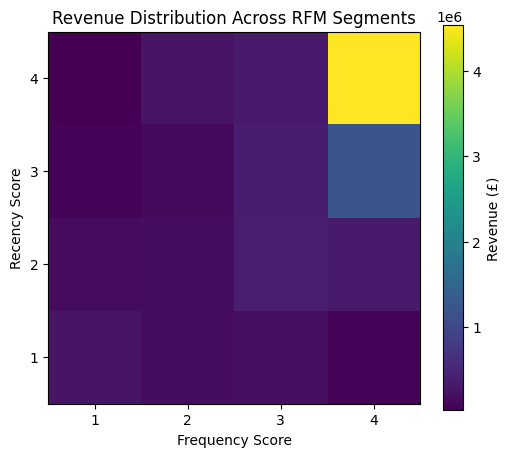

In [38]:
rf_revenue = (
    rfm
    .groupby(["R_score", "F_score"])["Monetary"]
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(6, 5))
plt.imshow(rf_revenue, origin="lower")

plt.colorbar(label="Revenue (£)")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.title("Revenue Distribution Across RFM Segments")

plt.xticks(range(4), [1, 2, 3, 4])
plt.yticks(range(4), [1, 2, 3, 4])

plt.show()


## Champion Product Preferences

After identifying Champion customers, we analyze what they buy to understand how their purchasing behavior differs from the rest of the customer base.

Rather than looking only at top-selling products overall, this section focuses on identifying products that are disproportionately purchased by high-value customers. This helps uncover items that may drive loyalty, repeat purchases, and long-term customer value.

In [ ]:
# Ensure segment column exists
if "Segment" not in rfm.columns:

    def rfm_segment(row):
        if row["RFM_Score"] == "444":
            return "Champions"
        elif row["R_score"] == 1 and row["M_score"] == 4:
            return "At-Risk High Value"
        elif row["R_score"] >= 3 and row["F_score"] >= 3:
            return "Loyal"
        elif row["R_score"] >= 3 and row["F_score"] <= 2:
            return "Potential Loyalist"
        elif row["R_score"] <= 2 and row["F_score"] <= 2:
            return "Hibernating"
        else:
            return "Others"

    rfm["Segment"] = rfm.apply(rfm_segment, axis=1)


In [ ]:
# Extract champion customer IDs
champion_ids = rfm.loc[rfm["Segment"] == "Champions"].index

In [ ]:
# Split transaction data 
df_champions = df_clean[df_clean["CustomerID"].isin(champion_ids)]
df_non_champions = df_clean[~df_clean["CustomerID"].isin(champion_ids)]

In [46]:
# Product revenue among Champions 
champion_product_rev = (
    df_champions
    .groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index()
)

# Product revenue overall
total_product_rev = (
    df_clean
    .groupby(["StockCode", "Description"])["Revenue"]
    .sum()
    .reset_index()
)

In [47]:
# Champion revenue share per product
product_affinity = champion_product_rev.merge(
    total_product_rev,
    on=["StockCode", "Description"],
    suffixes=("_champions", "_total")
)

product_affinity["champion_share"] = (
    product_affinity["Revenue_champions"]
    / product_affinity["Revenue_total"]
)

In [48]:
# Remove low-signal products
product_affinity = product_affinity[
    product_affinity["Revenue_total"] > 10_000
]

In [49]:
# Top products over-indexed among Champions
top_affinity_products = (
    product_affinity
    .sort_values("champion_share", ascending=False)
    .head(15)
)

top_affinity_products

,StockCode,Description,Revenue_champions,Revenue_total,champion_share
654,21623,VINTAGE UNION JACK MEMOBOARD,20331.08,23010.09,0.883572
1065,22188,BLACK HEART CARD HOLDER,10792.50,12487.17,0.864287
2719,48173C,DOORMAT BLACK FLOCK,8161.40,10025.11,0.814096
1066,22189,CREAM HEART CARD HOLDER,18047.90,23463.47,0.769191
2862,82484,WOOD BLACK BOARD ANT WHITE FINISH,26738.91,36030.22,0.742125
368,21137,BLACK RECORD COVER FRAME,29995.85,40652.13,0.737867
2749,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12411.54,17073.65,0.726941
2146,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,16521.68,23514.17,0.702627
1847,22988,SOLDIERS EGG CUP,7487.72,10938.31,0.684541
2723,48188,DOORMAT WELCOME PUPPIES,8232.20,12114.97,0.679506


<Axes: title={'center': 'Products Over-Indexed Among Champion Customers'}, xlabel='Share of Product Revenue from Champions', ylabel='Description'>

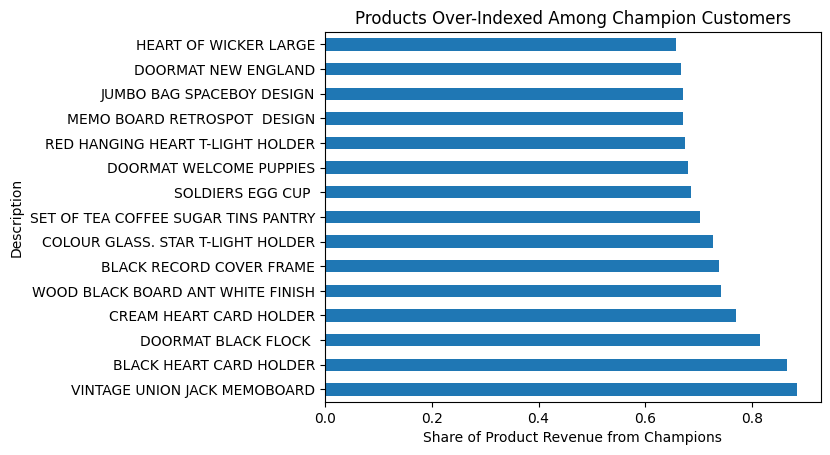

In [ ]:
top_affinity_products.set_index("Description")["champion_share"].plot(
    kind="barh",
    title="Products Over-Indexed Among Champion Customers",
    xlabel="Share of Product Revenue from Champions"
)

To understand what differentiates high-value customers from the rest of the customer base, we analyzed the share of each product’s revenue generated by Champion customers.

Rather than focusing on absolute sales volume, this approach highlights products that are disproportionately purchased by the company’s most valuable customers.

Several products derive more than 65–85% of their total revenue from Champion customers alone. For example:

- VINTAGE UNION JACK MEMOBOARD: 88% of revenue from Champions  
- BLACK HEART CARD HOLDER: 86% of revenue from Champions  
- DOORMAT BLACK FLOCK: 81% of revenue from Champions  

These products are not merely top sellers, but appear to be strongly associated with high-value, highly engaged customers.

### Business Interpretation

Products with exceptionally high Champion revenue share likely play one of two roles:

1. They attract high-value customers disproportionately, acting as premium or loyalty-linked items
2. They reinforce repeat purchasing behavior and long-term engagement among the best customers

In both cases, these products represent strategic assets for retention and personalization.

### Strategic Implications

These high-affinity products are strong candidates for:

- Personalized recommendations to Champion and near-Champion customers
- Bundled offers targeted at high-value segments
- Featured placement in loyalty and VIP campaigns

On the other hand, products with low Champion revenue share may be more transactional in nature and better suited for acquisition-focused promotions.